## Visualizing the PyTorch model

In [1]:
%matplotlib inline
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt


/Users/Yang/Material/Research/pytorch/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Parse the train and val losses one line at a time.
import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('convnet.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

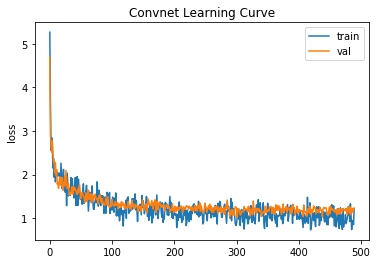

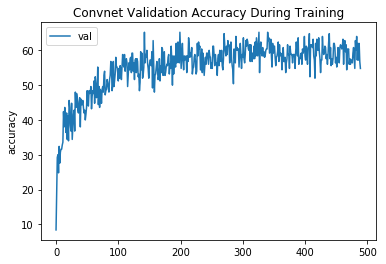

In [3]:
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Convnet Learning Curve')
plt.ylabel('loss')
plt.legend()
plt.savefig('Convnet Learning Curve')

plt.figure()
plt.plot(val_accs, label='val')
plt.title('Convnet Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Convnet Validation Accuracy During Training')